In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")

In [3]:
import pipit as pp

In [4]:
trace = pp.Trace.from_otf2("../../pipit/tests/data/ping-pong-otf2/")

In [5]:
trace.events

,Timestamp (ns),Event Type,Name,Thread,Process,Attributes
0,0.000000e+00,Instant,ProgramBegin,0,1,"{'attributes': {'Attribute 2': 26602}, 'progra..."
1,3.008309e+04,Enter,"int main(int, char**)",0,1,{'region': 'Region 3'}
2,4.028833e+04,Enter,MPI_Init,0,1,{'region': 'Region 148'}
3,3.077309e+05,Instant,ProgramBegin,0,0,"{'attributes': {'Attribute 2': 26601}, 'progra..."
4,3.369797e+05,Enter,"int main(int, char**)",0,0,{'region': 'Region 3'}
...,...,...,...,...,...,...
115,1.995748e+08,Leave,MPI_Finalize,0,1,None
116,1.995752e+08,Leave,"int main(int, char**)",0,0,None
117,1.995768e+08,Leave,"int main(int, char**)",0,1,None
118,1.996033e+08,Instant,ProgramEnd,0,0,{'exit_status': -9223372036854775808}


In [6]:
trace.definitions

,Definition Type,ID,Attributes
0,ClockProperties,NaN,"{'timer_resolution': 2095197216, 'global_offse..."
1,String,0.0,
2,String,1.0,machine
3,String,2.0,Linux
4,String,3.0,platform
...,...,...,...
528,SystemTreeNodeProperty,NaN,"{'system_tree_node': 'SystemTreeNode 0', 'name..."
529,SystemTreeNodeDomain,NaN,"{'system_tree_node': 'SystemTreeNode 0', 'syst..."
530,SystemTreeNodeDomain,NaN,"{'system_tree_node': 'SystemTreeNode 1', 'syst..."
531,CartCoordinate,NaN,"{'topology': 'CartTopology 0', 'rank': 0, 'coo..."


In [39]:
df = trace.events
df = df.rename(columns={"Timestamp (ns)": "ts", "Event Type": "type", "Name": "name", "Thread": "thread", "Process": "process", "Attributes": "attributes"})
df

,ts,type,name,thread,process,attributes
0,0.000000e+00,Instant,ProgramBegin,0,1,"{'attributes': {'Attribute 2': 26602}, 'progra..."
1,3.008309e+04,Enter,"int main(int, char**)",0,1,{'region': 'Region 3'}
2,4.028833e+04,Enter,MPI_Init,0,1,{'region': 'Region 148'}
3,3.077309e+05,Instant,ProgramBegin,0,0,"{'attributes': {'Attribute 2': 26601}, 'progra..."
4,3.369797e+05,Enter,"int main(int, char**)",0,0,{'region': 'Region 3'}
...,...,...,...,...,...,...
115,1.995748e+08,Leave,MPI_Finalize,0,1,None
116,1.995752e+08,Leave,"int main(int, char**)",0,0,None
117,1.995768e+08,Leave,"int main(int, char**)",0,1,None
118,1.996033e+08,Instant,ProgramEnd,0,0,{'exit_status': -9223372036854775808}


In [43]:
events_list = df.to_dict(orient="records")
events_list

[{'ts': 0.0,
  'type': 'Instant',
  'name': 'ProgramBegin',
  'thread': 0,
  'process': 1,
  'attributes': {'attributes': {'Attribute 2': 26602},
   'program_name': '/g/g92/bhatele1/umd/traces/score-p/ping-pong.otf2',
   'program_arguments': []}},
 {'ts': 30083.086937435106,
  'type': 'Enter',
  'name': 'int main(int, char**)',
  'thread': 0,
  'process': 1,
  'attributes': {'region': 'Region 3'}},
 {'ts': 40288.33150186851,
  'type': 'Enter',
  'name': 'MPI_Init',
  'thread': 0,
  'process': 1,
  'attributes': {'region': 'Region 148'}},
 {'ts': 307730.9358165928,
  'type': 'Instant',
  'name': 'ProgramBegin',
  'thread': 0,
  'process': 0,
  'attributes': {'attributes': {'Attribute 2': 26601},
   'program_name': '/g/g92/bhatele1/umd/traces/score-p/ping-pong.otf2',
   'program_arguments': []}},
 {'ts': 336979.73374932166,
  'type': 'Enter',
  'name': 'int main(int, char**)',
  'thread': 0,
  'process': 0,
  'attributes': {'region': 'Region 3'}},
 {'ts': 346054.77444467926,
  'type': 'E

In [53]:
fake_events_list = events_list * 50000

In [54]:
len(fake_events_list)

6000000

In [69]:
import numpy as np

In [79]:
%%time
total = sum(event["ts"] for event in fake_events_list)

CPU times: user 220 ms, sys: 0 ns, total: 220 ms
Wall time: 219 ms


In [108]:
fake_events_list_np = np.array(fake_events_list)

In [115]:
%%time
total = sum(map(itemgetter("ts"), fake_events_list))
total

CPU times: user 193 ms, sys: 0 ns, total: 193 ms
Wall time: 192 ms


1112224694147253.5

In [60]:
import pandas as pd

In [61]:
fakedf = pd.DataFrame(fake_events_list)

In [64]:
%%time
fakedf["ts"].sum()

CPU times: user 9.22 ms, sys: 0 ns, total: 9.22 ms
Wall time: 8.55 ms


1112224694150228.1

In [117]:
%%time
total = sum(event["ts"] for _, event in fakedf.iterrows())
total

KeyboardInterrupt: 

In [118]:
import numba
import pandas as pd

@numba.jit(nopython=True)
def calculate_total(ts_values):
    total = 0
    for ts in ts_values:
        total += ts
    return total

# Assuming fakedf is your DataFrame
result = calculate_total(ts_column)

print(result)

1112224694147253.5


In [124]:
import sqlite3

In [125]:
import pandas as pd
import sqlite3 as sq

df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
table_name = "test" # table and file name

conn = sq.connect('{}.sqlite'.format(table_name)) # creates file
df.to_sql(table_name, conn, if_exists='replace', index=False) # writes to file
conn.close() # good practice: close connection


In [126]:
conn = sq.connect('{}.sqlite'.format(table_name))
df = pd.read_sql('select * from {}'.format(table_name), conn)
conn.close()

In [127]:
df

,col1,col2
0,1,3
1,2,4


In [81]:
import dask
import dask.bag as db

In [101]:
l = list(range(10000000))

In [102]:
b = db.from_sequence(l, npartitions=4)
b

dask.bag<from_sequence, npartitions=4>

In [103]:
%%time
b.sum().compute()

CPU times: user 10.1 s, sys: 34.1 ms, total: 10.2 s
Wall time: 10.9 s


49999995000000

In [104]:
%%time
sum(l)

CPU times: user 47.3 ms, sys: 31.7 ms, total: 79 ms
Wall time: 78.7 ms


49999995000000

In [107]:
from joblib import Parallel, delayed
def process(i):
    return i * i
    
results = Parallel(n_jobs=2)(delayed(process)(i) for i in range(10))
print(results)  # prints [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [32]:
list(df.itertuples(index=False))[0]

Pandas(_0=0.0, _1='Instant', Name='ProgramBegin', Thread=0, Process=1, Attributes={'attributes': {'Attribute 2': 26602}, 'program_name': '/g/g92/bhatele1/umd/traces/score-p/ping-pong.otf2', 'program_arguments': []})

In [25]:
list(df.iterrows())[2][1]

Timestamp (ns)                40288.331502
Event Type                           Enter
Name                              MPI_Init
Thread                                   0
Process                                  1
Attributes        {'region': 'Region 148'}
Name: 2, dtype: object

In [10]:
list(df.itertuples())

[Pandas(Index=0, _1=0.0, _2='Instant', Name='ProgramBegin', Thread=0, Process=1, Attributes={'attributes': {'Attribute 2': 26602}, 'program_name': '/g/g92/bhatele1/umd/traces/score-p/ping-pong.otf2', 'program_arguments': []}),
 Pandas(Index=1, _1=30083.086937435106, _2='Enter', Name='int main(int, char**)', Thread=0, Process=1, Attributes={'region': 'Region 3'}),
 Pandas(Index=2, _1=40288.33150186851, _2='Enter', Name='MPI_Init', Thread=0, Process=1, Attributes={'region': 'Region 148'}),
 Pandas(Index=3, _1=307730.9358165928, _2='Instant', Name='ProgramBegin', Thread=0, Process=0, Attributes={'attributes': {'Attribute 2': 26601}, 'program_name': '/g/g92/bhatele1/umd/traces/score-p/ping-pong.otf2', 'program_arguments': []}),
 Pandas(Index=4, _1=336979.73374932166, _2='Enter', Name='int main(int, char**)', Thread=0, Process=0, Attributes={'region': 'Region 3'}),
 Pandas(Index=5, _1=346054.77444467926, _2='Enter', Name='MPI_Init', Thread=0, Process=0, Attributes={'region': 'Region 148'}),

In [ ]:
# class Event:
#     def __init__():
#         self 

# for index, row in trace.events.iterrows():
    

In [41]:
trace._match_events()
trace.events

,Timestamp (ns),Event Type,Name,Thread,Process,Attributes,_matching_event,_matching_timestamp
0,0.000000e+00,Instant,ProgramBegin,0,1,"{'attributes': {'Attribute 2': 26602}, 'progra...",<NA>,NaN
1,3.008309e+04,Enter,"int main(int, char**)",0,1,{'region': 'Region 3'},117,1.995768e+08
2,4.028833e+04,Enter,MPI_Init,0,1,{'region': 'Region 148'},7,1.936438e+08
3,3.077309e+05,Instant,ProgramBegin,0,0,"{'attributes': {'Attribute 2': 26601}, 'progra...",<NA>,NaN
4,3.369797e+05,Enter,"int main(int, char**)",0,0,{'region': 'Region 3'},116,1.995752e+08
...,...,...,...,...,...,...,...,...
115,1.995748e+08,Leave,MPI_Finalize,0,1,None,113,1.995297e+08
116,1.995752e+08,Leave,"int main(int, char**)",0,0,None,4,3.369797e+05
117,1.995768e+08,Leave,"int main(int, char**)",0,1,None,1,3.008309e+04
118,1.996033e+08,Instant,ProgramEnd,0,0,{'exit_status': -9223372036854775808},<NA>,NaN


In [28]:
trace._match_caller_callee()
trace.events

,Timestamp (ns),Event Type,Name,Thread,Process,Attributes,_matching_event,_matching_timestamp,_depth,_parent,_children
0,0.000000e+00,Instant,ProgramBegin,0,1,"{'attributes': {'Attribute 2': 26602}, 'progra...",<NA>,NaN,NaN,NaN,None
1,3.008309e+04,Enter,"int main(int, char**)",0,1,{'region': 'Region 3'},117,1.995768e+08,0,NaN,"[2, 9, 13, 18, 23, 28, 35, 40, 45, 54, 57, 66,..."
2,4.028833e+04,Enter,MPI_Init,0,1,{'region': 'Region 148'},7,1.936438e+08,1,1,None
3,3.077309e+05,Instant,ProgramBegin,0,0,"{'attributes': {'Attribute 2': 26601}, 'progra...",<NA>,NaN,NaN,NaN,None
4,3.369797e+05,Enter,"int main(int, char**)",0,0,{'region': 'Region 3'},116,1.995752e+08,0,NaN,"[5, 8, 12, 16, 20, 29, 33, 41, 48, 52, 60, 64,..."
...,...,...,...,...,...,...,...,...,...,...,...
115,1.995748e+08,Leave,MPI_Finalize,0,1,None,113,1.995297e+08,NaN,NaN,None
116,1.995752e+08,Leave,"int main(int, char**)",0,0,None,4,3.369797e+05,NaN,NaN,None
117,1.995768e+08,Leave,"int main(int, char**)",0,1,None,1,3.008309e+04,NaN,NaN,None
118,1.996033e+08,Instant,ProgramEnd,0,0,{'exit_status': -9223372036854775808},<NA>,NaN,NaN,NaN,None


In [37]:
trace.calc_inc_metrics()
trace.events[["Timestamp (ns)", "Event Type", "Name", "Thread","Process","_matching_event","_matching_timestamp", "_depth", "_parent", "_children", "time.inc"]]

,Timestamp (ns),Event Type,Name,Thread,Process,_matching_event,_matching_timestamp,_depth,_parent,_children,time.inc
0,0.000000e+00,Instant,ProgramBegin,0,1,<NA>,NaN,NaN,NaN,None,NaN
1,3.008309e+04,Enter,"int main(int, char**)",0,1,117,1.995768e+08,0,NaN,"[2, 9, 13, 18, 23, 28, 35, 40, 45, 54, 57, 66,...",1.995467e+08
2,4.028833e+04,Enter,MPI_Init,0,1,7,1.936438e+08,1,1,None,1.936035e+08
3,3.077309e+05,Instant,ProgramBegin,0,0,<NA>,NaN,NaN,NaN,None,NaN
4,3.369797e+05,Enter,"int main(int, char**)",0,0,116,1.995752e+08,0,NaN,"[5, 8, 12, 16, 20, 29, 33, 41, 48, 52, 60, 64,...",1.992383e+08
...,...,...,...,...,...,...,...,...,...,...,...
115,1.995748e+08,Leave,MPI_Finalize,0,1,113,1.995297e+08,NaN,NaN,None,NaN
116,1.995752e+08,Leave,"int main(int, char**)",0,0,4,3.369797e+05,NaN,NaN,None,NaN
117,1.995768e+08,Leave,"int main(int, char**)",0,1,1,3.008309e+04,NaN,NaN,None,NaN
118,1.996033e+08,Instant,ProgramEnd,0,0,<NA>,NaN,NaN,NaN,None,NaN


In [36]:
trace.calc_exc_metrics()
trace.events[["Timestamp (ns)", "Event Type", "Name", "Thread","Process","_matching_event","_matching_timestamp", "_depth", "_parent", "_children", "time.inc", "time.exc"]]

,Timestamp (ns),Event Type,Name,Thread,Process,_matching_event,_matching_timestamp,_depth,_parent,_children,time.inc,time.exc
0,0.000000e+00,Instant,ProgramBegin,0,1,<NA>,NaN,NaN,NaN,None,NaN,NaN
1,3.008309e+04,Enter,"int main(int, char**)",0,1,117,1.995768e+08,0,NaN,"[2, 9, 13, 18, 23, 28, 35, 40, 45, 54, 57, 66,...",1.995467e+08,2.980792e+06
2,4.028833e+04,Enter,MPI_Init,0,1,7,1.936438e+08,1,1,None,1.936035e+08,1.936035e+08
3,3.077309e+05,Instant,ProgramBegin,0,0,<NA>,NaN,NaN,NaN,None,NaN,NaN
4,3.369797e+05,Enter,"int main(int, char**)",0,0,116,1.995752e+08,0,NaN,"[5, 8, 12, 16, 20, 29, 33, 41, 48, 52, 60, 64,...",1.992383e+08,2.384380e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.995748e+08,Leave,MPI_Finalize,0,1,113,1.995297e+08,NaN,NaN,None,NaN,NaN
116,1.995752e+08,Leave,"int main(int, char**)",0,0,4,3.369797e+05,NaN,NaN,None,NaN,NaN
117,1.995768e+08,Leave,"int main(int, char**)",0,1,1,3.008309e+04,NaN,NaN,None,NaN,NaN
118,1.996033e+08,Instant,ProgramEnd,0,0,<NA>,NaN,NaN,NaN,None,NaN,NaN


In [42]:
trace.flat_profile()

,time.exc
Name,
MPI_Comm_rank,1.102999e+03
MPI_Comm_size,1.482438e+03
MPI_Finalize,5.198842e+04
MPI_Init,1.934503e+08
MPI_Recv,1.458979e+06
MPI_Send,1.746035e+06
MpiRecv,NaN
MpiSend,NaN
ProgramBegin,NaN


In [43]:
trace.flat_profile(per_process=True)

time.exc
Name                  Process              
MPI_Comm_rank         0        1.139750e+03
                      1        1.066248e+03
MPI_Comm_size         0        1.516802e+03
                      1        1.448074e+03
MPI_Finalize          0        5.886988e+04
                      1        4.510697e+04
MPI_Init              0        1.932971e+08
                      1        1.936035e+08
MPI_Recv              0        1.725006e+06
                      1        1.192951e+06
MPI_Send              0        1.770268e+06
                      1        1.721803e+06
int main(int, char**) 0        2.384380e+06
                      1        2.980792e+06

In [53]:
a, b = trace.comm_over_time()

In [55]:
trace.comm_by_process()

,Sent,Received
Process,,
0,4177920.0,4177920.0
1,4177920.0,4177920.0


In [56]:
trace.idle_time()

,Process,Idle Time
0,0,0.0
1,1,0.0


In [61]:
trace.load_imbalance()

TypeError: sort_values() missing 1 required positional argument: 'by'

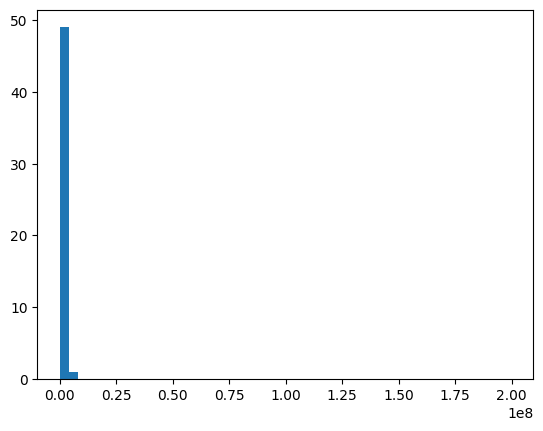

In [54]:
import matplotlib.pyplot as plt
_ = plt.hist(a, b)  # arguments are passed to np.histogram
plt.show()

In [48]:
!pip install matplotlib